<a href="https://colab.research.google.com/github/nikitaagarwal1992/Data-science/blob/main/Final_Capstone_4_Adjusted_for_Imbalanced_Dataset_of_Lending_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('/content/lending_club_loan_two.csv')
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
def feat_info(col_name):
  """
  This function retrieves the description of a column from the 'Description'
  column of the DataFrame.

  The function first checks if the provided column name exists in the DataFrame's columns.
  If it does, it prints the description associated with that column.
  If not, it prints an error message indicating that the column was not found.
  """
  if col_name in data.columns:
    print(data[col_name].describe()) # Print descriptive statistics of the column
  else:
    print(f"Error: Column '{col_name}' not found in the DataFrame.")

feat_info('mort_acc')

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64


In [ ]:
'''
0	loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
1	term	The number of payments on the loan. Values are in months and can be either 36 or 60.
2	int_rate	Interest Rate on the loan
3	installment	The monthly payment owed by the borrower if the loan originates.
4	grade	LC assigned loan grade
5	sub_grade	LC assigned loan subgrade
6	emp_title	The job title supplied by the Borrower when applying for the loan.*
7	emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8	home_ownership	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
9	annual_inc	The self-reported annual income provided by the borrower during registration.
10	verification_status	Indicates if income was verified by LC, not verified, or if the income source was verified
11	issue_d	The month which the loan was funded
12	loan_status	Current status of the loan
13	purpose	A category provided by the borrower for the loan request.
14	title	The loan title provided by the borrower
15	zip_code	The first 3 numbers of the zip code provided by the borrower in the loan application.
16	addr_state	The state provided by the borrower in the loan application
17	dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
18	earliest_cr_line	The month the borrower's earliest reported credit line was opened
19	open_acc	The number of open credit lines in the borrower's credit file.
20	pub_rec	Number of derogatory public records
21	revol_bal	Total credit revolving balance
22	revol_util	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
23	total_acc	The total number of credit lines currently in the borrower's credit file
24	initial_list_status	The initial listing status of the loan. Possible values are – W, F
25	application_type	Indicates whether the loan is an individual application or a joint application with two co-borrowers
26	mort_acc	Number of mortgage accounts.
27	pub_rec_bankruptcies	Number of public record bankruptcies
'''

"\n0\tloan_amnt\tThe listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.\n1\tterm\tThe number of payments on the loan. Values are in months and can be either 36 or 60.\n2\tint_rate\tInterest Rate on the loan\n3\tinstallment\tThe monthly payment owed by the borrower if the loan originates.\n4\tgrade\tLC assigned loan grade\n5\tsub_grade\tLC assigned loan subgrade\n6\temp_title\tThe job title supplied by the Borrower when applying for the loan.*\n7\temp_length\tEmployment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.\n8\thome_ownership\tThe home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER\n9\tannual_inc\tThe self-reported annual income provided by the borrower during registration.\n10\tverification_status\

In [ ]:
'''
1. loan_amnt
Description: The amount of money the borrower is requesting.
Example: If the borrower applied for a loan of $15,000, this column will have the value 15000.
Scenario: If a borrower initially applies for a $15,000 loan but the lending institution decides to reduce it to $10,000 after assessing the borrower’s credit risk, the column will show 10000.

2. term
Description: The loan repayment duration, measured in months.
Example: A value of 36 means the borrower will repay the loan over 3 years. A value of 60 means repayment over 5 years.
Scenario: If the borrower opts for a 60-month repayment plan for their loan, the column will contain 60.

3. int_rate
Description: The interest rate on the loan as a percentage.
Example: If a borrower is charged an interest rate of 12.5%, this column will display 12.50.
Scenario: A borrower with better credit might get a rate of 8.99%, while one with a riskier profile might get a rate of 24.99%.

4. installment
Description: The fixed monthly payment the borrower has to make.
Example: If the borrower’s monthly payment is $200, this column will show 200.00.
Scenario: A loan of $10,000 over 36 months at an interest rate of 12% would have a monthly installment of approximately $332.14.

5. grade
Description: Lending Club (LC) assigns a letter grade based on credit risk.
Example: Grades range from A (the least risky) to G (the riskiest).
Scenario: A borrower with an excellent credit score may be assigned a grade of A, while one with poor credit might be assigned a grade of G.

6. sub_grade
Description: A more granular breakdown within each grade (e.g., A1, A2, etc.).
Example: If the loan is high-quality but not at the very top, the borrower might be assigned a sub-grade of A3.
Scenario: A borrower with decent but not perfect credit could be assigned a sub-grade of B2.

7. emp_title
Description: The borrower’s job title at the time of application.
Example: This could be something like "Software Engineer" or "Teacher".
Scenario: A borrower applying for a loan might list their job as "Data Analyst" or "Retail Manager".

8. emp_length
Description: The length of employment in years.
Example: If the borrower has been working at their current job for 5 years, this column will display 5.
Scenario: A borrower who has been with their current employer for less than a year will have a value of 0, while one who’s been employed for over 10 years will have 10.

9. home_ownership
Description: The borrower’s home ownership status.
Example: Possible values include RENT, OWN, MORTGAGE, or OTHER.
Scenario: If a borrower is renting their home, the column will show RENT. If they have a mortgage, the column will show MORTGAGE.

10. annual_inc
Description: The borrower’s self-reported annual income.
Example: If the borrower earns $80,000 per year, this column will show 80000.
Scenario: A borrower who earns $50,000 a year will report an income of 50000.

11. verification_status
Description: Whether or not the borrower’s income has been verified.
Example: Possible values include Verified, Source Verified, or Not Verified.
Scenario: A borrower who has provided documents that have been checked by Lending Club will have the status Verified.

12. issue_d
Description: The date when the loan was issued.
Example: If the loan was issued in January 2023, this column will show Jan-2023.
Scenario: A borrower’s loan issued in March 2021 will have Mar-2021.

13. loan_status
Description: The current status of the loan.
Example: Common values include Fully Paid, Charged Off, Current, Late (31-120 days).
Scenario: If the borrower is still making monthly payments on time, the status will be Current.

14. purpose
Description: The stated purpose for the loan.
Example: Values can include Debt Consolidation, Home Improvement, Medical, etc.
Scenario: A borrower requesting a loan to consolidate credit card debt will have Debt Consolidation in this column.

15. title
Description: The loan title provided by the borrower.
Example: It might be "Car Loan" or "Credit Card Debt".
Scenario: The title is typically similar to the purpose but customized by the borrower (e.g., "Vacation Loan").

16. zip_code
Description: The first three digits of the borrower’s zip code.
Example: If a borrower lives in the area with zip code 94016, this column will show 940.
Scenario: A borrower living in the 10001 zip code in New York will have 100 in this field.

17. addr_state
Description: The state where the borrower lives.
Example: If a borrower lives in California, this column will display CA.
Scenario: A borrower from Texas will have TX.

18. dti (Debt-to-Income Ratio)
Description: The ratio of a borrower’s total monthly debt payments to their monthly income.
Example: If a borrower has $2,000 in monthly debt payments and earns $6,000 per month, their DTI is 33.33.
Scenario: A borrower with $1,500 in monthly debt payments and a $5,000 monthly income will have a DTI of 30.

19. earliest_cr_line
Description: The date the borrower opened their first credit line.
Example: If the borrower’s first credit account was opened in January 2005, this column will show Jan-2005.
Scenario: A borrower who opened their first credit line in 2010 will have 2010 in this field.

20. open_acc
Description: The number of open credit accounts the borrower has.
Example: If the borrower has 5 open accounts, this column will show 5.
Scenario: A borrower who has 3 open credit cards and 2 loans will have 5.

21. pub_rec
Description: The number of derogatory public records (such as bankruptcies) in the borrower’s file.
Example: If a borrower has 1 public record, this column will show 1.
Scenario: A borrower with no bankruptcies or liens will have 0 in this column.

22. revol_bal
Description: The borrower’s total revolving credit balance.
Example: If the borrower has $5,000 in credit card debt, this column will show 5000.
Scenario: A borrower with $10,000 in revolving credit balances will have 10000.

23. revol_util
Description: The percentage of available revolving credit the borrower is using.
Example: If the borrower has used 50% of their available credit, this column will show 50.00.
Scenario: A borrower using $3,000 out of a $10,000 credit limit will have 30.00 in this column.

24. total_acc
Description: The total number of credit accounts the borrower has.
Example: If the borrower has 15 accounts in total, this column will show 15.
Scenario: A borrower with 20 credit accounts, including loans and credit cards, will have 20.

25. initial_list_status
Description: The loan’s initial listing status.
Example: The values are W for whole loan and F for fractional loan.
Scenario: If the loan is available for fractional investment by multiple investors, this column will show F.

26. application_type
Description: Indicates whether the loan application is individual or joint.
Example: Possible values are Individual or Joint.
Scenario: A borrower applying with a co-borrow
'''

'\n1. loan_amnt\nDescription: The amount of money the borrower is requesting.\nExample: If the borrower applied for a loan of $15,000, this column will have the value 15000.\nScenario: If a borrower initially applies for a $15,000 loan but the lending institution decides to reduce it to $10,000 after assessing the borrower’s credit risk, the column will show 10000.\n\n2. term\nDescription: The loan repayment duration, measured in months.\nExample: A value of 36 means the borrower will repay the loan over 3 years. A value of 60 means repayment over 5 years.\nScenario: If the borrower opts for a 60-month repayment plan for their loan, the column will contain 60.\n\n3. int_rate\nDescription: The interest rate on the loan as a percentage.\nExample: If a borrower is charged an interest rate of 12.5%, this column will display 12.50.\nScenario: A borrower with better credit might get a rate of 8.99%, while one with a riskier profile might get a rate of 24.99%.\n\n4. installment\nDescription: 

EDA

<Axes: xlabel='loan_status', ylabel='count'>

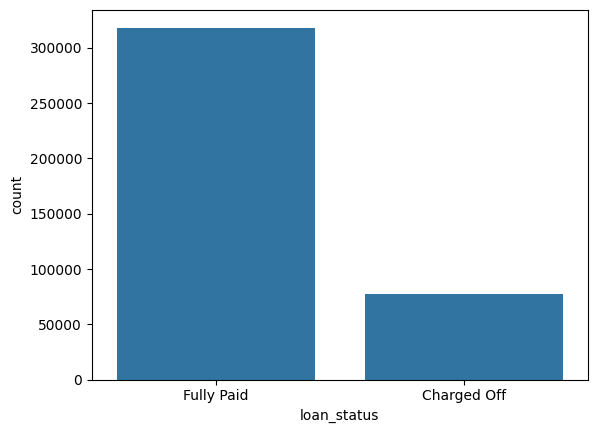

In [ ]:
sns.countplot(x ='loan_status', data= data)

<Axes: xlabel='loan_amnt', ylabel='Density'>

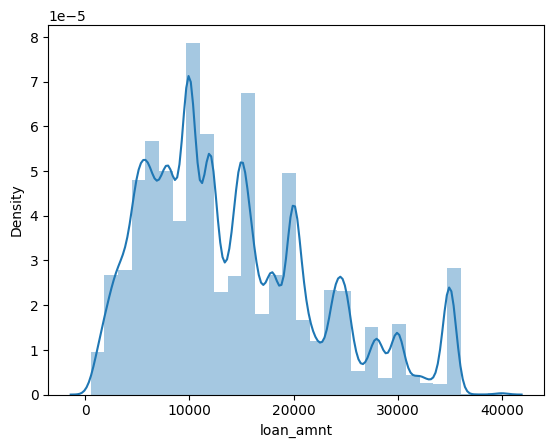

In [ ]:
sns.distplot(data['loan_amnt'], bins= 30, kde= True)

In [ ]:
data.dtypes


,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [ ]:
float_cols = data.select_dtypes(include=['float64'])

# Calculate the correlation matrix for the float columns
corr_matrix = float_cols.corr()

print(corr_matrix)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.05745

<Axes: >

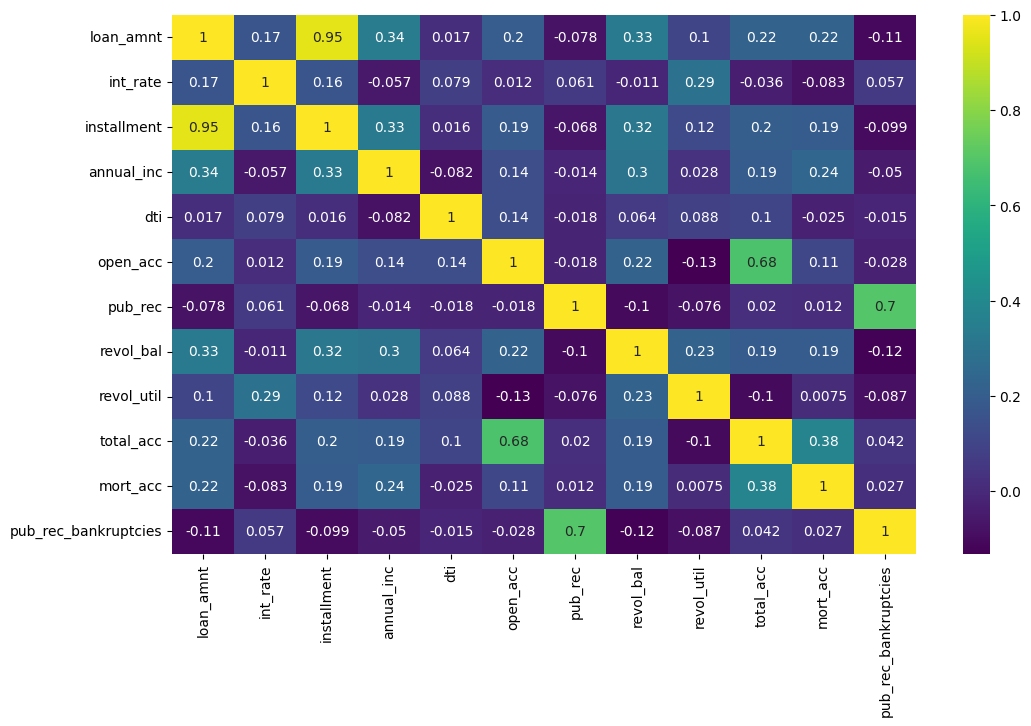

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

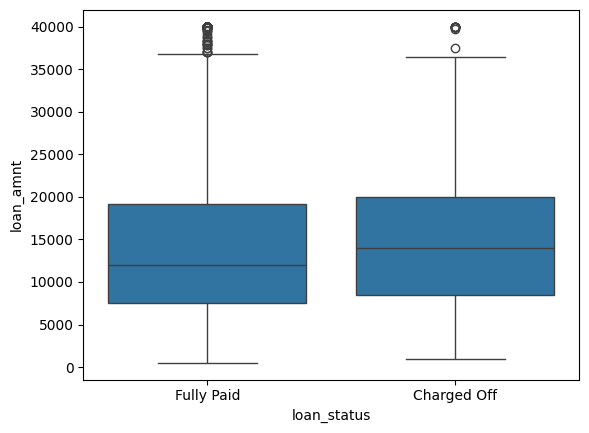

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=data)

<Axes: xlabel='grade', ylabel='count'>

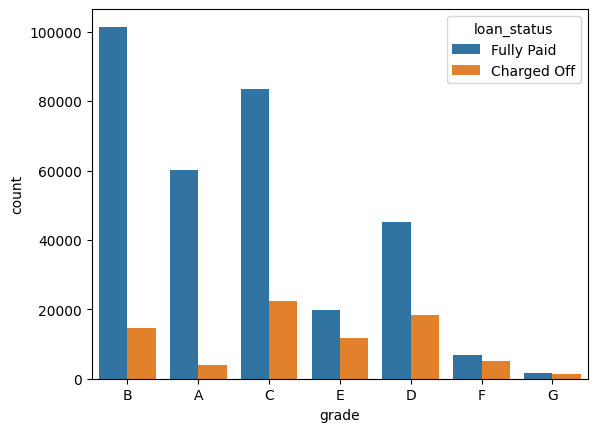

In [ ]:
sns.countplot(x='grade',data=data,hue='loan_status')

In [ ]:
# Find %

grade_co = data[data['loan_status'] == 'Charged Off'].groupby('grade').count()['loan_status']

grade_fp = data[data['loan_status'] == 'Fully Paid'].groupby('grade').count()['loan_status']

grade_paid_pect = (grade_co/(grade_co + grade_fp))*100

In [ ]:
grade_co

,loan_status
grade,
A,4036
B,14587
C,22449
D,18338
E,11765
F,5037
G,1461


In [ ]:
grade_fp

,loan_status
grade,
A,60151
B,101431
C,83538
D,45186
E,19723
F,6735
G,1593


In [ ]:
grade_paid_pect.reset_index()

,grade,loan_status
0,A,6.287878
1,B,12.573049
2,C,21.180900
3,D,28.867829
4,E,37.363440
5,F,42.787971
6,G,47.838900


In [ ]:
grade_data = pd.DataFrame(grade_paid_pect)

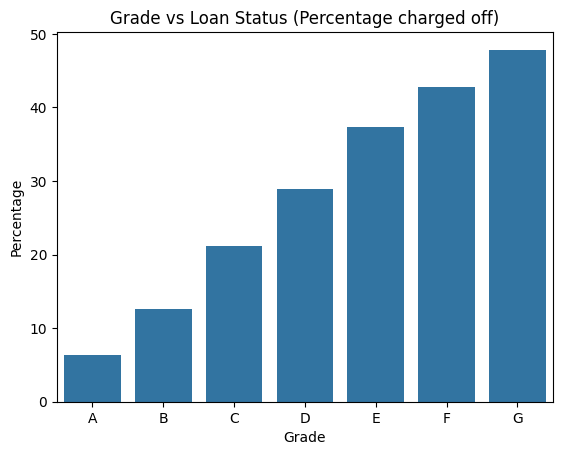

In [ ]:
sns.barplot(x='grade',y='loan_status',data=grade_data)
plt.title('Grade vs Loan Status (Percentage charged off)')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.show()

<Axes: xlabel='sub_grade', ylabel='count'>

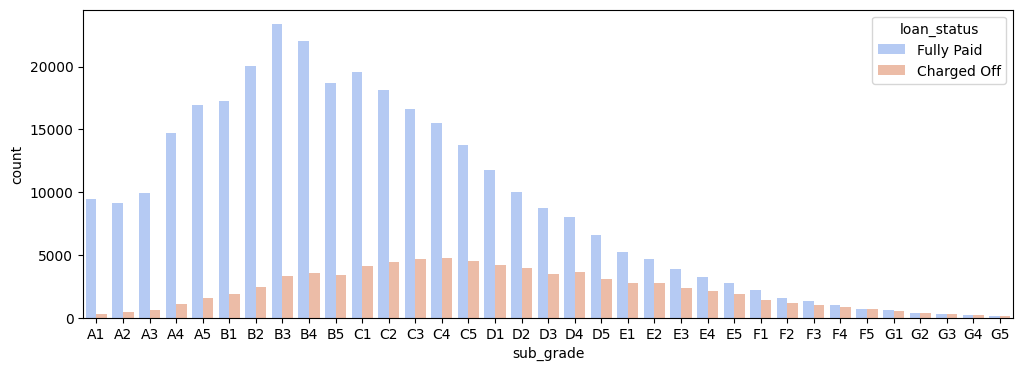

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

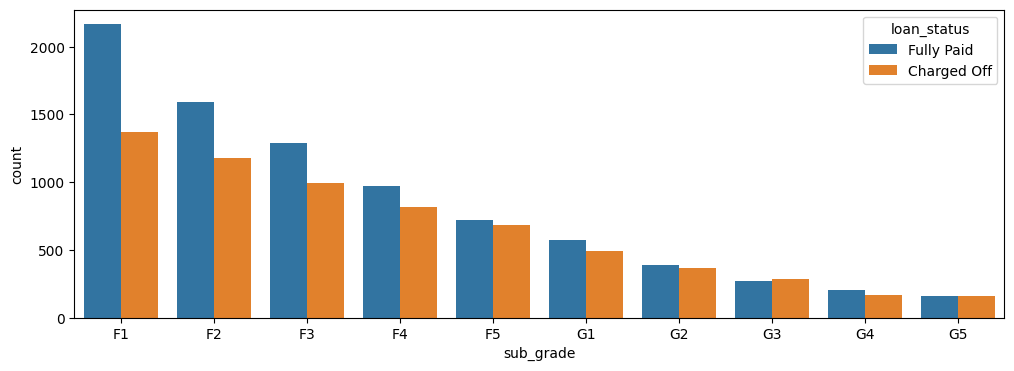

In [ ]:
f_and_g = data[(data['grade']=='G') | (data['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [ ]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
data['loan_repaid'].value_counts()

,count
loan_repaid,
1,318357
0,77673


In [ ]:
data['loan_status'].value_counts()

,count
loan_status,
Fully Paid,318357
Charged Off,77673


In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
data.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [ ]:
float_cols = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the float columns
corr_matrix = float_cols.corr()

print(corr_matrix)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.05745

<Axes: >

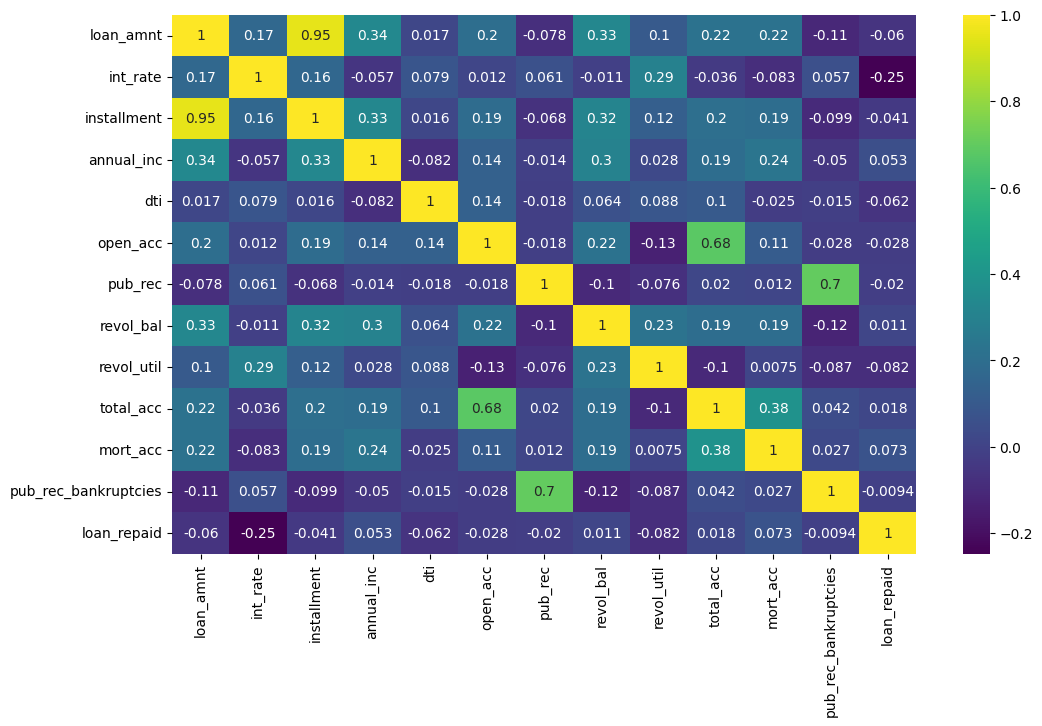

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

<Axes: >

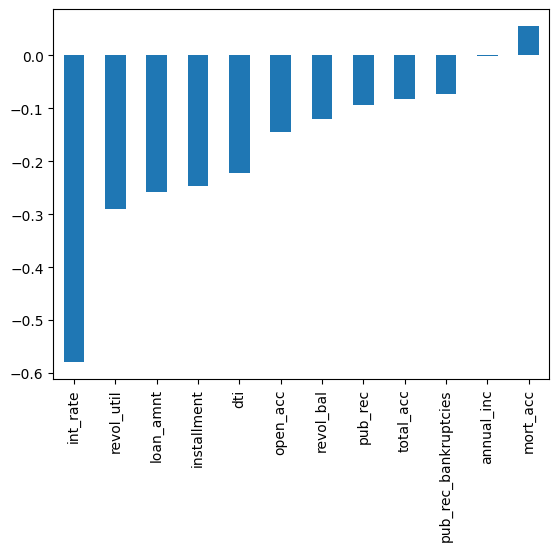

In [ ]:
corr_matrix.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Missing Values

In [ ]:
data.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
100* data.isnull().sum()/len(data)

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


Let's examine emp_title and emp_length to see whether it will be okay to drop them.

In [ ]:
data['emp_title'].nunique()

173105

In [ ]:
data.value_counts('emp_title')

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
Hy Powered,1
Hy Vee,1
Hy-Vee Food Store,1


Too many unique values for empl title to convert to num values. We can drop

In [ ]:
df = data.drop('emp_title',axis=1)

In [ ]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

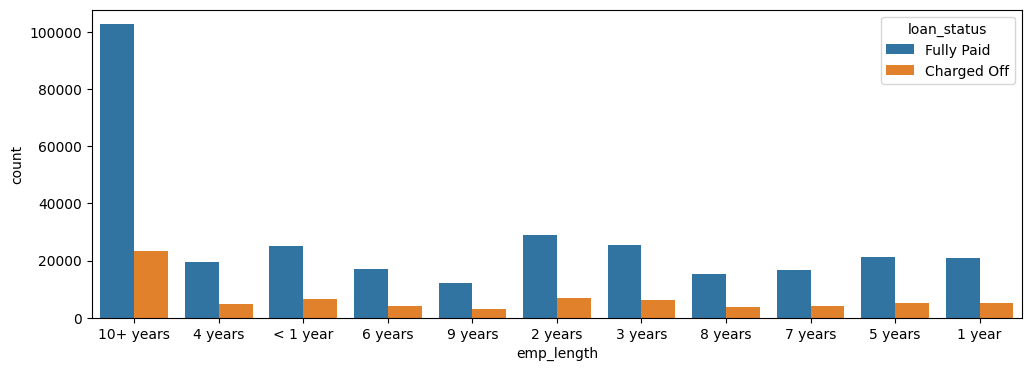

In [ ]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df, hue = 'loan_status')

In [ ]:
# Find %

emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

paid_pect = (emp_co/emp_fp)*100

In [ ]:

paid_pect

,loan_status
emp_length,
1 year,24.864917
10+ years,22.576975
2 years,23.955991
3 years,24.259310
4 years,23.821340
5 years,23.791057
6 years,23.334122
7 years,24.188738
8 years,24.962514


Looks consistent. We can drop off the column

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df[['title', 'purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


Drop Title Column

In [ ]:
df = df.drop('title',axis=1)

<Axes: xlabel='loan_repaid', ylabel='count'>

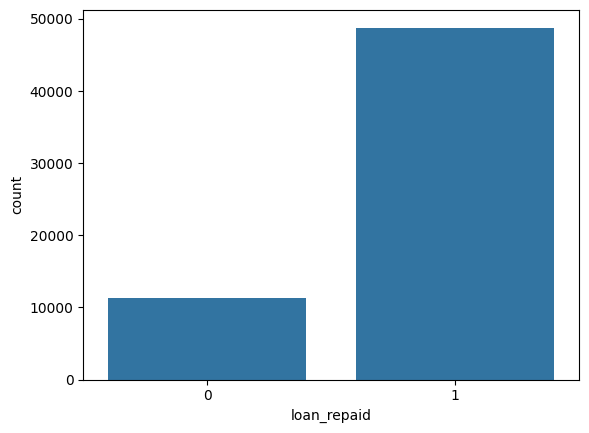

In [ ]:
rows_with_nan = data[data.isnull().any(axis=1)]

# Display the rows with NaN values
sns.countplot(x='loan_repaid',data=rows_with_nan)

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
home_ownership,object
annual_inc,float64
verification_status,object
issue_d,object


Categorical Variables and Dummy Variables

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
# Term

# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,int64
int_rate,float64
installment,float64
grade,object
sub_grade,object
home_ownership,object
annual_inc,float64
verification_status,object
issue_d,object


In [ ]:
# Drop Grade and Keep Subgrade
df = df.drop('grade',axis=1)

In [ ]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,False,False,False,False,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [ ]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
df['address'].dtype

dtype('O')

earliest_cr_line :
This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [ ]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,int64
int_rate,float64
installment,float64
annual_inc,float64
...,...
48052,bool
70466,bool
86630,bool
93700,bool


In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [ ]:
# Display columns that have missing values
null_columns = df.columns[df.isnull().any()]

# Show those columns
print(df[null_columns])

        revol_util  mort_acc  pub_rec_bankruptcies
0             41.8       0.0                   0.0
1             53.3       3.0                   0.0
2             92.2       0.0                   0.0
3             21.5       0.0                   0.0
4             69.8       1.0                   0.0
...            ...       ...                   ...
396025        34.3       0.0                   0.0
396026        95.7       1.0                   0.0
396027        66.9       0.0                   0.0
396028        53.8       5.0                   0.0
396029        91.3       NaN                   0.0

[396030 rows x 3 columns]


In [ ]:
# Convert 'mort_acc' to numeric type if it's not
df['mort_acc'] = pd.to_numeric(df['mort_acc'], errors='coerce')

# Calculate the average of 'mort_acc' for each group of 'total_acc'
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

# Print the result
print(total_acc_avg)

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [ ]:
total_acc_avg[2.0]

0.0

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.

    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
# Display columns that have missing values
null_columns = df.columns[df.isnull().any()]

# Show those columns
print(df[null_columns])

        revol_util  pub_rec_bankruptcies
0             41.8                   0.0
1             53.3                   0.0
2             92.2                   0.0
3             21.5                   0.0
4             69.8                   0.0
...            ...                   ...
396025        34.3                   0.0
396026        95.7                   0.0
396027        66.9                   0.0
396028        53.8                   0.0
396029        91.3                   0.0

[396030 rows x 2 columns]


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(395219, 80)

In [ ]:
# Display columns that have missing values
null_columns = df.columns[df.isnull().any()]

# Show those columns
print(df[null_columns])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[395219 rows x 0 columns]


In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,False,False,True,False,False,False,False,False,False,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,True,False,False,False,False,False,False,False,False,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,True,False,False,False,False,False,False,False,False,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,False,True,False,False,False,False,False,False,False,1999
5,20000.0,36,13.33,677.07,86788.0,Fully Paid,16.31,8.0,0.0,25757.0,...,False,False,False,False,True,False,False,False,False,2005
6,18000.0,36,5.32,542.07,125000.0,Fully Paid,1.36,8.0,0.0,4178.0,...,False,False,True,False,False,False,False,False,False,2005
7,13000.0,36,11.14,426.47,46000.0,Fully Paid,26.87,11.0,0.0,13425.0,...,False,False,False,False,True,False,False,False,False,1994
8,18900.0,60,10.99,410.84,103000.0,Fully Paid,12.52,13.0,0.0,18637.0,...,False,False,True,False,False,False,False,False,False,1994
9,26300.0,36,16.29,928.40,115000.0,Fully Paid,23.69,13.0,0.0,22171.0,...,False,False,False,False,False,False,False,False,False,1997


In [ ]:
df = df[(df['annual_inc'] > 20000) & (df['annual_inc'] < 160000)]

In [ ]:
df['annual_inc'].describe()

,annual_inc
count,372946.000000
mean,68036.434560
std,29366.057005
min,20001.000000
25%,45000.000000
50%,62000.000000
75%,85000.000000
max,159996.000000


In [ ]:
df.shape

(372946, 80)

<Axes: xlabel='loan_repaid', ylabel='annual_inc'>

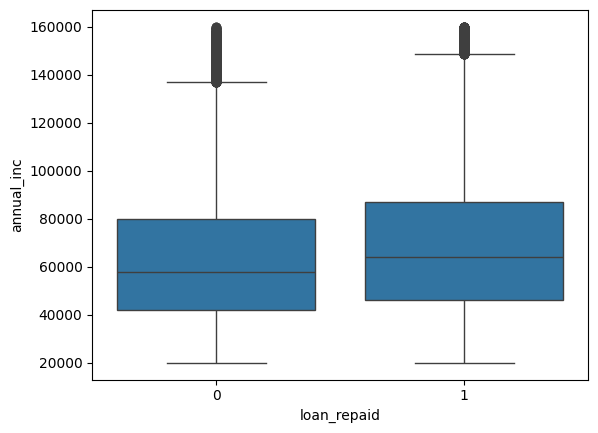

In [ ]:
sns.boxplot(x='loan_repaid',y='annual_inc',data=df)

In [ ]:
df.shape

(372946, 80)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '226

In [ ]:
# Identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0 and 1)
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [ ]:
df = df.drop('loan_status', axis = 1)

In [ ]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [ ]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
count,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,...,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000,372946.000000
mean,13879.825632,41.756072,13.657541,424.429918,68036.434560,17.584540,11.293107,0.178916,14905.956946,53.825317,...,0.114384,0.028503,0.142951,0.114590,0.142616,0.141310,0.143943,0.027921,0.028248,1997.961335
std,8059.545637,10.247616,4.456176,240.445235,29366.057005,8.081201,5.084817,0.527869,15662.630153,24.328278,...,0.318277,0.166404,0.350023,0.318527,0.349681,0.348342,0.351032,0.164747,0.165681,7.134068
min,500.000000,36.000000,5.320000,16.080000,20001.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1944.000000
25%,8000.000000,36.000000,10.490000,251.750000,45000.000000,11.580000,8.000000,0.000000,6050.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000
50%,12000.000000,36.000000,13.330000,372.210000,62000.000000,17.180000,10.000000,0.000000,11074.500000,54.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000
75%,19075.000000,36.000000,16.490000,553.160000,85000.000000,23.190000,14.000000,0.000000,19084.000000,72.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000
max,40000.000000,60.000000,30.990000,1503.850000,159996.000000,92.130000,90.000000,86.000000,814300.000000,892.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [ ]:
X.shape

(372946, 78)

In [ ]:
print(np.unique(y))

[0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
X_train.shape

(298356, 78)

In [ ]:
y_train.shape

(298356,)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Creating Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm



In [ ]:

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:

model.fit(x=X_train,
          y=y_train,
          epochs=15,
          batch_size=256,
          validation_data=(X_test, y_test),
          )


Epoch 1/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.3570 - val_loss: 0.2612
Epoch 2/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2652 - val_loss: 0.2592
Epoch 3/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2614 - val_loss: 0.2586
Epoch 4/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2605 - val_loss: 0.2587
Epoch 5/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2605 - val_loss: 0.2582
Epoch 6/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2594 - val_loss: 0.2583
Epoch 7/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2600 - val_loss: 0.2587
Epoch 8/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2584 - val_loss: 0.2582
Epoch 9/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2593 - val_loss: 0.2579
Epoch 10/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2576 - val_loss: 0.2580
Epoch 11/15
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2594 - val_loss: 0.2575
Epoch 12/15
1166/1166 ━━━━━

In [ ]:

# Use model.predict() instead of model.predict_classes()
predictions = model.predict(X_test)

# You can then convert the predictions to class labels
# using a threshold (e.g., 0.5 for binary classification)
predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

2331/2331 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.46      0.62     14738
           1       0.88      0.99      0.93     59852

    accuracy                           0.89     74590
   macro avg       0.92      0.73      0.78     74590
weighted avg       0.90      0.89      0.87     74590

[[ 6771  7967]
 [  355 59497]]


In [ ]:
'''
Class 0:
6725 true negatives (correctly predicted as class 0).
8933 false positives (class 0 samples incorrectly predicted as class 1).
Class 1:
4 false negatives (class 1 samples incorrectly predicted as class 0).
63382 true positives (correctly predicted as class 1).

'''

'\nClass 0:\n6725 true negatives (correctly predicted as class 0).\n8933 false positives (class 0 samples incorrectly predicted as class 1).\nClass 1:\n4 false negatives (class 1 samples incorrectly predicted as class 0).\n63382 true positives (correctly predicted as class 1).\n\n'

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [ ]:
df.shape

(372946, 79)

In [ ]:


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split






In [ ]:
### Random UnderSampler
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X, y)

# Check the new class distribution
print(f"After Under Oversampling: {Counter(y_under)}")


# Split data
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

After Under Oversampling: Counter({0: 73629, 1: 73629})


In [ ]:
scaler = MinMaxScaler()
X_train_under = scaler.fit_transform(X_train_under)
X_test_under = scaler.transform(X_test_under)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train_under,
          y=y_train_under,
          epochs=15,
          batch_size=256,
          validation_data=(X_test_under, y_test_under),
          )

Epoch 1/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5458 - val_loss: 0.3732
Epoch 2/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3738 - val_loss: 0.3641
Epoch 3/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3640 - val_loss: 0.3616
Epoch 4/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3583 - val_loss: 0.3616
Epoch 5/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3591 - val_loss: 0.3613
Epoch 6/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3560 - val_loss: 0.3618
Epoch 7/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3550 - val_loss: 0.3600
Epoch 8/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3532 - val_loss: 0.3604
Epoch 9/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3526 - val_loss: 0.3603
Epoch 10/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3538 - val_loss: 0.3603
Epoch 11/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3534 - val_loss: 0.3605
Epoch 12/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

In [ ]:
# Use model.predict() instead of model.predict_classes()
predictions = model.predict(X_test_under)

# You can then convert the predictions to class labels
# using a threshold (e.g., 0.5 for binary classification)
predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_under,predictions))

print(confusion_matrix(y_test_under,predictions))

1381/1381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     22034
           1       0.80      0.80      0.80     22144

    accuracy                           0.80     44178
   macro avg       0.80      0.80      0.80     44178
weighted avg       0.80      0.80      0.80     44178

[[17599  4435]
 [ 4396 17748]]


In [ ]:
### Smote OverSampler
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution
print(f"After SMote Oversampling: {Counter(y_smote)}")


# Split data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

KeyboardInterrupt: 

In [ ]:
scaler = MinMaxScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train_smote,
          y=y_train_smote,
          epochs=15,
          batch_size=256,
          validation_data=(X_test_smote, y_test_smote),
          )

Epoch 1/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3772 - val_loss: 0.2333
Epoch 2/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2481 - val_loss: 0.2092
Epoch 3/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2237 - val_loss: 0.1979
Epoch 4/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2097 - val_loss: 0.1907
Epoch 5/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2030 - val_loss: 0.1831
Epoch 6/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1967 - val_loss: 0.1831
Epoch 7/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1924 - val_loss: 0.1809
Epoch 8/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1907 - val_loss: 0.1822
Epoch 9/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1874 - val_loss: 0.1817
Epoch 10/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1869 - val_loss: 0.1791
Epoch 11/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1846 - val_loss: 0.1784
Epoch 12/15
1637/1637 ━━━

In [ ]:
# Use model.predict() instead of model.predict_classes()
predictions = model.predict(X_test_smote)

# You can then convert the predictions to class labels
# using a threshold (e.g., 0.5 for binary classification)
predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_smote,predictions))

print(confusion_matrix(y_test_smote,predictions))

5613/5613 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     89753
           1       0.87      1.00      0.93     89838

    accuracy                           0.92    179591
   macro avg       0.93      0.92      0.92    179591
weighted avg       0.93      0.92      0.92    179591

[[76242 13511]
 [  440 89398]]


In [ ]:

### Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Check the new class distribution
print(f"After Random Oversampling: {Counter(y_ros)}")


# Split data
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

After Random Oversampling: Counter({1: 299317, 0: 299317})


In [ ]:
scaler = MinMaxScaler()
X_train_ros = scaler.fit_transform(X_train_ros)
X_test_ros = scaler.transform(X_test_ros)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:
model.fit(x=X_train_ros,
          y=y_train_ros,
          epochs=15,
          batch_size=256,
          validation_data=(X_test_ros, y_test_ros),
          )

Epoch 1/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.4405 - val_loss: 0.3569
Epoch 2/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3587 - val_loss: 0.3559
Epoch 3/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3578 - val_loss: 0.3548
Epoch 4/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.3544 - val_loss: 0.3543
Epoch 5/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3548 - val_loss: 0.3540
Epoch 6/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3529 - val_loss: 0.3528
Epoch 7/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3532 - val_loss: 0.3526
Epoch 8/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.3530 - val_loss: 0.3537
Epoch 9/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.3512 - val_loss: 0.3513
Epoch 10/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.3497 - val_loss: 0.3508
Epoch 11/15
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.3504 - val_loss: 0.3502
Epoch 12/15
1637/1637 

In [ ]:
# Use model.predict() instead of model.predict_classes()
predictions = model.predict(X_test_ros)

# You can then convert the predictions to class labels
# using a threshold (e.g., 0.5 for binary classification)
predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_ros,predictions))

5613/5613 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     89753
           1       0.82      0.79      0.80     89838

    accuracy                           0.81    179591
   macro avg       0.81      0.81      0.81    179591
weighted avg       0.81      0.81      0.81    179591



In [ ]:
print(confusion_matrix(y_test_ros,predictions))

[[73803 15950]
 [18594 71244]]


In [ ]:
import numpy as np

# Example confusion matrix
confusion_matrix = np.array([[76279, 13474],
                             [412, 89426]])

# Compute the total number of samples
total_samples = np.sum(confusion_matrix)

# Convert the confusion matrix to percentages
confusion_matrix_percentage = (confusion_matrix / total_samples) * 100

# Print the confusion matrix in percentages
print("Confusion Matrix (in %):")
print(confusion_matrix_percentage)

Confusion Matrix (in %):
[[42.47373198  7.50260314]
 [ 0.22941016 49.79425472]]


In [ ]:
# Evaluate the model
score = model.evaluate(X_test_smote, y_test_smote, verbose=0)

# Print the test loss
print('Test loss:', score)

Test loss: 0.31424880027770996


In [ ]:
# Evaluate the model
score = model.evaluate(X_train_smote, y_train_smote, verbose=0)

# Print the test loss
print('Train loss:', score)

Train loss: 0.310003399848938


the SMOTE model (SMOTE over sample) provides a more balanced performance with improved recall for Class 0 and better F1-score compared to the other models.

True Negatives (TN): 76,279 (Correctly predicted as Class 0)
False Positives (FP): 13,474 (Incorrectly predicted as Class 1, but actually Class 0)
False Negatives (FN): 412 (Incorrectly predicted as Class 0, but actually Class 1)
True Positives (TP): 89,426 (Correctly predicted as Class 1)